In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from hdf5storage import savemat
from hdf5storage import loadmat
import matplotlib.patches as mpatches
import matplotlib
import hickle

import sys
sys.path.append('../src')

In [2]:
import evaluation.eval_rank as eval_rank
import evaluation.eval_utils as eval_utils

In [3]:
data_path= '../data/opp7.hkl'
with open(data_path, 'r') as fin:
    data = hickle.load(fin)

test_gt = data['test_gt'][:,:,-1]

In [4]:
test_gt[0]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [5]:
data_num_step = 1024

In [6]:
test_gt_idx_changes = []
for i in range(len(test_gt)):
    idx_changes = np.where(test_gt[i]==1)[0]
    test_gt_idx_changes.append(idx_changes)    

In [7]:
len(test_gt_idx_changes), test_gt_idx_changes[0]

(233, array([], dtype=int64))

In [8]:
CNN_64 = loadmat("../poc/pocCNN_cpd_64"+'.mat')['poc']
NWN_64 = loadmat("../poc/pocDWN_cpd_64"+'.mat')['poc']
RCNN64 = loadmat("../poc/pocRCNN_cpd_64"+'.mat')['poc']

In [9]:
CNN_64.shape

(233, 16)

In [10]:
CNN_64

array([[ 0.16535422,  0.39934596,  0.29572359, ...,  0.03123209,
         0.0333687 ,  0.04415155],
       [ 0.04507657,  0.03969199,  0.03309965, ...,  0.5560208 ,
         0.72121197,  0.86195368],
       [ 0.04165751,  0.03263503,  0.03591856, ...,  0.03380702,
         0.03386131,  0.07008134],
       ..., 
       [ 0.05826   ,  0.05629288,  0.05714899, ...,  0.10413261,
         0.10402013,  0.14812155],
       [ 0.90667033,  0.12506595,  0.44961563, ...,  0.06665713,
         0.26511115,  0.16039014],
       [ 0.2188563 ,  0.10948278,  0.17293459, ...,  0.11072297,
         0.0722653 ,  0.06968151]], dtype=float32)

In [11]:
cpd_val_CNN64, cpd_CNN64 = eval_rank.non_max_supression(CNN_64, window=0, data_num_step=data_num_step)
cpd_val_NWN64, cpd_NWN64 = eval_rank.non_max_supression(NWN_64, window=0, data_num_step=data_num_step)
cpd_valRCNN64, cpdRCNN64 = eval_rank.non_max_supression(RCNN64, window=0, data_num_step=data_num_step)

In [12]:
def tolerance_auc(cpd_val, cpd, gt_mean_test, tolerance):
    out_put = []
    for t in tolerance:
        print t
        out = eval_rank.ranking(cpd_val, cpd, gt_mean_test, t)
        out_put.append(eval_utils.calc_auc(zip(out[0], out[1]), gt_mean_test))
        
    return out_put    

In [13]:
tolerance = [8, 16, 32, 64, 128, 256, 512]
tol_auc_CNN64 = tolerance_auc(cpd_val_CNN64, cpd_CNN64, test_gt_idx_changes, tolerance)
tol_auc_NWN64 = tolerance_auc(cpd_val_NWN64, cpd_NWN64, test_gt_idx_changes, tolerance)
tol_auc_RCNN64 = tolerance_auc(cpd_valRCNN64, cpdRCNN64, test_gt_idx_changes, tolerance)

#tol_auc_CNN32 = tolerance_auc(cpd_val_CNN32, cpd_CNN32, test_gt_idx_changes, tolerance)
#tol_auc_NWN32 = tolerance_auc(cpd_val_NWN32, cpd_NWN32, test_gt_idx_changes, tolerance)

8
16
32
64
128
256
512
8
16
64
128
256
512
8
16
32
64
128
256
512


/data2/data/zebrahim/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


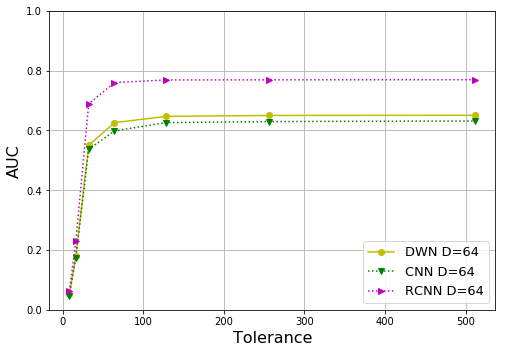

In [14]:
plt.figure(figsize=(8,5.5))
plt.plot(tolerance,tol_auc_NWN64,'-oy',label ='DWN D=64')
plt.plot(tolerance,tol_auc_CNN64,':vg',label ='CNN D=64')
plt.plot(tolerance,tol_auc_RCNN64,'>:m',label ='RCNN D=64')

font = {'family' : 'normal',
        'size'   : 15
         }

matplotlib.rc('font', **font)

plt.legend(loc='lower right', fontsize = 13)
plt.ylim([0,1], )
plt.grid()
plt.xlabel('Tolerance', fontsize = 16)
plt.ylabel('AUC', fontsize = 16)

# show the results
plt.show()

#save the results
#plt.savefig('../plot/plt1.png', bbox_inches = 'tight')

IOError: [Errno 2] No such file or directory: '../plot/plt1.png'

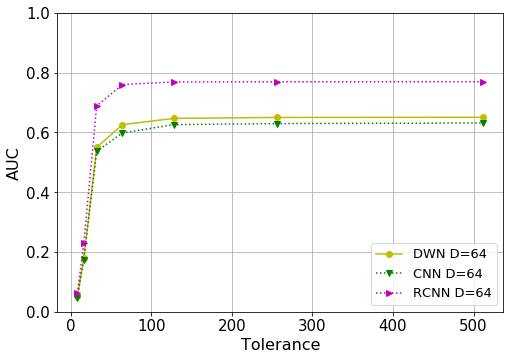

In [15]:
plt.figure(figsize=(8,5.5))
plt.plot(tolerance,tol_auc_NWN64,'-oy',label ='DWN D=64')
plt.plot(tolerance,tol_auc_CNN64,':vg',label ='CNN D=64')
plt.plot(tolerance,tol_auc_RCNN64,'>:m',label ='RCNN D=64')

font = {'family' : 'normal',
        'size'   : 15
         }

matplotlib.rc('font', **font)

plt.legend(loc='lower right', fontsize = 13)
plt.ylim([0,1], )
plt.grid()
plt.xlabel('Tolerance', fontsize = 16)
plt.ylabel('AUC', fontsize = 16)

# show the results
#plt.show()

#save the results
plt.savefig('../plot/plt1.png', bbox_inches = 'tight')

In [ ]:
1